In [ ]:
# Install required libraries
!pip install wordcloud imbalanced-learn nltk gradio

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import gradio as gr

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load dataset
df = pd.read_csv('/content/amazon.csv.zip')

In [ ]:
# Clean rating column
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.dropna(subset=['rating'], inplace=True)
df['rating'] = df['rating'].astype(int)

In [ ]:
# Map sentiment
def map_sentiment(rating):
    if rating >= 4:
        return 'Positive'

    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(map_sentiment)

In [ ]:
# Enhanced preprocessing to preserve negations
lemmatizer = WordNetLemmatizer()
custom_stopwords = set(stopwords.words('english')) - {'not', 'no', 'nor', 'never'}

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]
    return ' '.join(words)

df['cleaned_review'] = df['review_content'].apply(clean_text)

In [ ]:
# Vectorization using TF-IDF with bigrams
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']


In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)



In [ ]:
# Logistic Regression model with balanced weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8918918918918919

Classification Report:

              precision    recall  f1-score   support

    Negative       0.86      0.93      0.90       222
    Positive       0.93      0.85      0.89       222

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



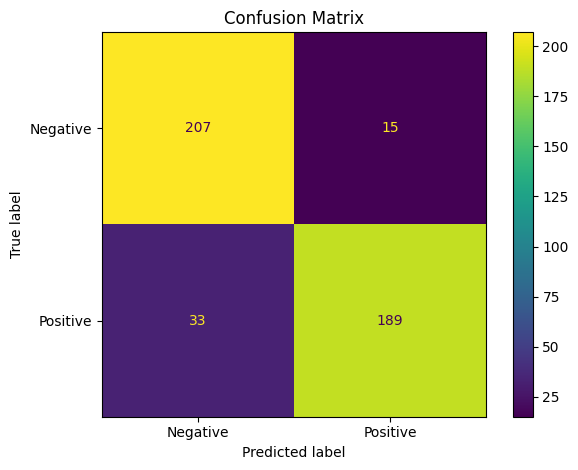

In [ ]:

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



In [ ]:
# Sentiment prediction function
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    return model.predict(vectorized)[0]



In [ ]:
# Gradio interface
def analyze_sentiment(review):
    sentiment = predict_sentiment(review)
    return f"Predicted Sentiment: {sentiment}"

interface = gr.Interface(
    fn=analyze_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter a product review here..."),
    outputs="text",
    title="Amazon Review Sentiment Analyzer",
    description="Enter a product review and get the predicted sentiment (Positive or Negative)."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://56033f77839b2b65e1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
